Challenge Set 3

Topic: Linear Regression

Date: 2/4/2016

Name: Justin Stewart

# Linear Regression and Learning Curve challenges

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

### Challenge 1

Generate (fake) data that is linearly related to log(x). You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.) Simulate some data from this model. Then fit two models to it: quadratic (second degree polynomial) and logarithmic (log(x)) (The second one should fit really well, since it has the same form as the underlying model!)

In [38]:
x = np.array(np.random.rand(1000,1))

In [40]:
b0,b1 = 5,3

In [41]:
y = b0 + b1*np.log(x)

In [45]:
rgr_sq = LinearRegression()
rgr_sq.fit(np.square(x),y)
print rgr_sq.score(np.square(x),y)


0.593093027819


In [46]:
rgr_log = LinearRegression()
rgr_log.fit(np.log(x),y)
print rgr_log.score(np.log(x),y)

1.0


### Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.) Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You could use sklearn.metrics.mean_squared_error.)

In [48]:
X = np.array(np.random.rand(1000,1))

In [57]:
e = np.array(np.random.rand(1000,1))

In [50]:
b0,b1,b2  = 5,3,2.5

In [58]:
y = b0 + b1*X + b2*np.square(X) + e

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=1)

In [60]:
rgr = LinearRegression()
rgr.fit(x_train,y_train)
preds_train = rgr.predict(x_train)
print mean_squared_error(y_train,preds_train)

0.111051039752


In [61]:
preds_test = rgr.predict(x_test)
print mean_squared_error(y_test,preds_test)

0.104194897001


### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC


In [62]:
r2 = []
mse_test = []
mse_train = []
for i in range(8):
    poly = PolynomialFeatures(i)
    Xnew = poly.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(Xnew,y,test_size=.33,random_state=1)
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    preds_train, preds_test = rgr.predict(x_train),rgr.predict(x_test)
    
    mse_train.append(mean_squared_error(y_train,preds_train)) 
    mse_test.append(mean_squared_error(y_test,preds_test))
    r2.append(rgr.score(x_train,y_train))
    
    d = {}
    d['r2'] = r2
    d['mse_train'] = mse_train
    d['mse_test'] = mse_test
    d['poly'] = range(8)


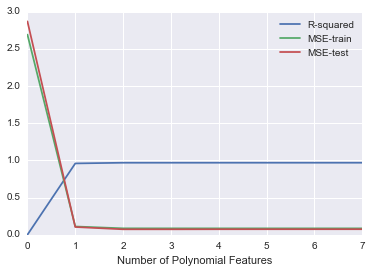

In [66]:
plt.plot(d['poly'],d['r2'],label='R-squared')
plt.plot(d['poly'],d['mse_train'],label='MSE-train')
plt.plot(d['poly'],d['mse_test'],label='MSE-test')
plt.xlabel('Number of Polynomial Features')
plt.legend()

### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.